In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
atlanta = pd.read_csv('atlanta.csv', skiprows = 2)
chicago = pd.read_csv('chicago.csv', skiprows = 2)
flights = pd.read_csv('flights.csv')

In [3]:
flights = flights.dropna(subset=['dep_delay'])

In [4]:
chicago

,time,precipitation (mm),rain (mm),snowfall (cm)
0,2013-01-01T00:00,0.0,0.0,0.0
1,2013-01-01T01:00,0.0,0.0,0.0
2,2013-01-01T02:00,0.0,0.0,0.0
3,2013-01-01T03:00,0.0,0.0,0.0
4,2013-01-01T04:00,0.0,0.0,0.0
...,...,...,...,...
6547,2013-09-30T19:00,0.0,0.0,0.0
6548,2013-09-30T20:00,0.0,0.0,0.0
6549,2013-09-30T21:00,0.0,0.0,0.0
6550,2013-09-30T22:00,0.0,0.0,0.0


In [5]:
big_delays = flights[flights.dep_delay > 60]

In [6]:
big_delays

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
119,119,2013,1,1,811.0,630,101.0,1047.0,830,137.0,...,4576,N531MQ,LGA,CLT,118.0,544,6,30,2013-01-01 06:00:00,Envoy Air
135,135,2013,1,1,826.0,715,71.0,1136.0,1045,51.0,...,443,N3GVAA,JFK,MIA,160.0,1089,7,15,2013-01-01 07:00:00,American Airlines Inc.
151,151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,...,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00,Envoy Air
218,218,2013,1,1,957.0,733,144.0,1056.0,853,123.0,...,856,N534UA,EWR,BOS,37.0,200,7,33,2013-01-01 07:00:00,United Air Lines Inc.
268,268,2013,1,1,1114.0,900,134.0,1447.0,1222,145.0,...,1086,N76502,LGA,IAH,248.0,1416,9,0,2013-01-01 09:00:00,United Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336742,336742,2013,9,30,2119.0,2005,74.0,2310.0,2212,58.0,...,4321,N17984,EWR,MCI,147.0,1092,20,5,2013-09-30 20:00:00,ExpressJet Airlines Inc.
336757,336757,2013,9,30,2159.0,1845,194.0,2344.0,2030,194.0,...,3320,N906XJ,JFK,BUF,50.0,301,18,45,2013-09-30 18:00:00,Endeavor Air Inc.
336760,336760,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,...,4672,N12145,EWR,STL,120.0,872,20,59,2013-09-30 20:00:00,ExpressJet Airlines Inc.
336762,336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,...,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-09-30 21:00:00,United Air Lines Inc.


In [7]:
ration = big_delays.shape[0] / flights.shape[0]
ration

#8% OF FLIGHTS HAVE BIG DEPARTURE DELAY

0.08091111374919716

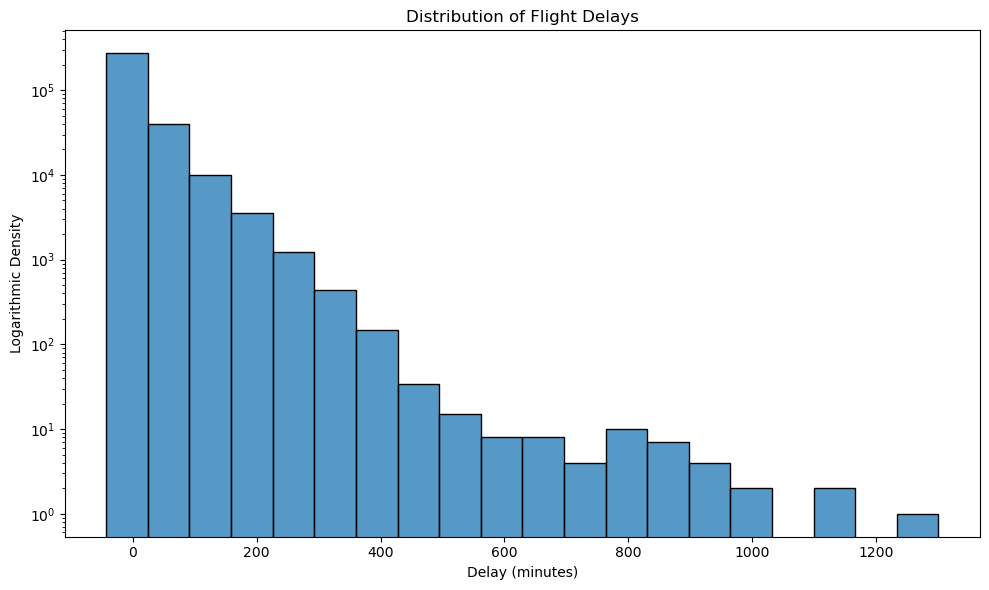

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=flights, x="dep_delay", bins=20, log_scale=(False, True), ax=ax)

plt.title("Distribution of Flight Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Logarithmic Density")
plt.tight_layout()

plt.savefig("flight_delay_distribution.png") 

[Text(-100, 0, '-100'),
 Text(-50, 0, '-50'),
 Text(0, 0, '0'),
 Text(50, 0, '50'),
 Text(100, 0, '100'),
 Text(150, 0, '150'),
 Text(200, 0, '200'),
 Text(250, 0, '250'),
 Text(300, 0, '300'),
 Text(350, 0, '350'),
 Text(400, 0, '400'),
 Text(450, 0, '450'),
 Text(500, 0, '500'),
 Text(600, 0, '600'),
 Text(700, 0, '700'),
 Text(800, 0, '800'),
 Text(900, 0, '900'),
 Text(1000, 0, '1000'),
 Text(1100, 0, '1100'),
 Text(1200, 0, '1200')]

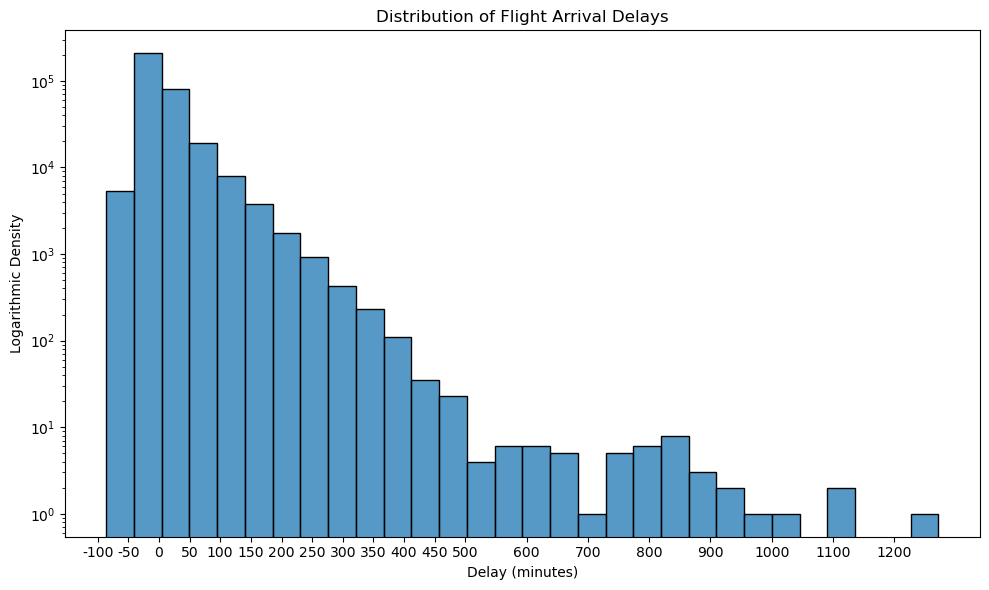

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=flights, x="arr_delay", bins=30, log_scale=(False, True), ax=ax)

plt.title("Distribution of Flight Arrival Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Logarithmic Density")
plt.tight_layout()

x_ticks = np.concatenate([np.arange(-100, 501, 50), np.arange(600, 1201, 100)])
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks)


#THE PLANED ARRIVAL TIME IS MADE WITH THE EXPECTATION OF DELAY

In [10]:
flights.origin.unique()
#EWR = Newark Liberty International Airport(New York)
#LGA = LaGuardia Airport(New York)
#JFK = John F. Kennedy International Airport(New York)

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [11]:
atlanta_flights = flights[flights.dest == 'ATL']
chicago_flights = flights[flights.dest == 'ORD']

In [12]:
atlanta_flights.shape

(16898, 21)

In [13]:
chicago_flights.shape

(16642, 21)

In [14]:
chicago_flights

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
5,5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,...,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00,United Air Lines Inc.
9,9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,...,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00,American Airlines Inc.
25,25,2013,1,1,608.0,600,8.0,807.0,735,32.0,...,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00,Envoy Air
38,38,2013,1,1,629.0,630,-1.0,824.0,810,14.0,...,303,N3CYAA,LGA,ORD,140.0,733,6,30,2013-01-01 06:00:00,American Airlines Inc.
57,57,2013,1,1,656.0,700,-4.0,854.0,850,4.0,...,305,N4WNAA,LGA,ORD,143.0,733,7,0,2013-01-01 07:00:00,American Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336645,336645,2013,9,30,1928.0,1940,-12.0,2043.0,2120,-37.0,...,363,N4XBAA,LGA,ORD,109.0,733,19,40,2013-09-30 19:00:00,American Airlines Inc.
336669,336669,2013,9,30,1953.0,2000,-7.0,2119.0,2132,-13.0,...,695,N853UA,LGA,ORD,107.0,733,20,0,2013-09-30 20:00:00,United Air Lines Inc.
336675,336675,2013,9,30,1958.0,2005,-7.0,2119.0,2130,-11.0,...,3604,N511MQ,EWR,ORD,102.0,719,20,5,2013-09-30 20:00:00,Envoy Air
336696,336696,2013,9,30,2017.0,2022,-5.0,2132.0,2155,-23.0,...,105,N298JB,JFK,ORD,112.0,740,20,22,2013-09-30 20:00:00,JetBlue Airways


In [15]:
#Chicago time zone is -1 hour from New York and Atlanta
chicago_flights = chicago_flights[['year', 'month', 'day', 'sched_dep_time', 'dep_delay', 'sched_arr_time', 'arr_delay', 'air_time', 'hour', 'minute', 'time_hour', 'name']]
atlanta_flights = atlanta_flights[['year', 'month', 'day', 'sched_dep_time', 'dep_delay', 'sched_arr_time', 'arr_delay', 'air_time', 'hour', 'minute', 'time_hour', 'name']]

In [16]:
atlanta_flights

,year,month,day,sched_dep_time,dep_delay,sched_arr_time,arr_delay,air_time,hour,minute,time_hour,name
4,2013,1,1,600,-6.0,837,-25.0,116.0,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
18,2013,1,1,600,0.0,825,12.0,134.0,6,0,2013-01-01 06:00:00,Envoy Air
23,2013,1,1,610,-4.0,845,-8.0,128.0,6,10,2013-01-01 06:00:00,Delta Air Lines Inc.
29,2013,1,1,615,0.0,842,-9.0,120.0,6,15,2013-01-01 06:00:00,Delta Air Lines Inc.
62,2013,1,1,700,-2.0,939,5.0,126.0,7,0,2013-01-01 07:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...
336621,2013,9,30,1859,4.0,2126,-1.0,101.0,18,59,2013-09-30 18:00:00,AirTran Airways Corporation
336642,2013,9,30,1930,-4.0,2201,-15.0,95.0,19,30,2013-09-30 19:00:00,Delta Air Lines Inc.
336665,2013,9,30,1950,-6.0,2215,-7.0,100.0,19,50,2013-09-30 19:00:00,Envoy Air
336670,2013,9,30,2000,-5.0,2230,-11.0,99.0,20,0,2013-09-30 20:00:00,Delta Air Lines Inc.


In [51]:
atlanta_flights = atlanta_flights.dropna()

In [52]:
#EVALUATING SHEDULED ARRIVAL TIME
atlanta.time = pd.to_datetime(atlanta.time)

atlanta_flights['time_hour'] = pd.to_datetime(atlanta_flights['time_hour'])
atlanta_flights['shed_arrival_time'] = atlanta_flights.time_hour + pd.to_timedelta(atlanta_flights.minute, unit = 'm') +\
pd.to_timedelta(atlanta_flights.air_time, unit = 'm')

C:\Users\butel\AppData\Local\Temp\ipykernel_1032\2524132025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlanta_flights['time_hour'] = pd.to_datetime(atlanta_flights['time_hour'])
C:\Users\butel\AppData\Local\Temp\ipykernel_1032\2524132025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlanta_flights['shed_arrival_time'] = atlanta_flights.time_hour + pd.to_timedelta(atlanta_flights.minute, unit = 'm') +\


In [53]:
atlanta_flights

,year,month,day,sched_dep_time,dep_delay,sched_arr_time,arr_delay,air_time,hour,minute,time_hour,name,shed_arrival_time
4,2013,1,1,600,-6.0,837,-25.0,116.0,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.,2013-01-01 07:56:00
18,2013,1,1,600,0.0,825,12.0,134.0,6,0,2013-01-01 06:00:00,Envoy Air,2013-01-01 08:14:00
23,2013,1,1,610,-4.0,845,-8.0,128.0,6,10,2013-01-01 06:00:00,Delta Air Lines Inc.,2013-01-01 08:18:00
29,2013,1,1,615,0.0,842,-9.0,120.0,6,15,2013-01-01 06:00:00,Delta Air Lines Inc.,2013-01-01 08:15:00
62,2013,1,1,700,-2.0,939,5.0,126.0,7,0,2013-01-01 07:00:00,Delta Air Lines Inc.,2013-01-01 09:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336621,2013,9,30,1859,4.0,2126,-1.0,101.0,18,59,2013-09-30 18:00:00,AirTran Airways Corporation,2013-09-30 20:40:00
336642,2013,9,30,1930,-4.0,2201,-15.0,95.0,19,30,2013-09-30 19:00:00,Delta Air Lines Inc.,2013-09-30 21:05:00
336665,2013,9,30,1950,-6.0,2215,-7.0,100.0,19,50,2013-09-30 19:00:00,Envoy Air,2013-09-30 21:30:00
336670,2013,9,30,2000,-5.0,2230,-11.0,99.0,20,0,2013-09-30 20:00:00,Delta Air Lines Inc.,2013-09-30 21:39:00


In [54]:
def find_nearest_hours(row, n):
    shed_time = pd.to_datetime(row.shed_arrival_time)
    year = shed_time.year
    month = shed_time.month
    day = shed_time.day
    hour = shed_time.hour
    
    if n % 2 == 1:
        start_hour = pd.Timestamp(year, month, day, hour, 0)
        if shed_time.minute >= 30:
            start_hour = start_hour + pd.to_timedelta(1, unit = 'h')   
            
        nearest_hours = [start_hour -  pd.to_timedelta(i, unit = 'h') for i in range(n//2 + 1)]
        nearest_hours = nearest_hours[::-1] + [start_hour +  pd.to_timedelta(i, unit = 'h') for i in range(1, n//2 + 1)]
    else:
        nearest_hours = [start_hour -  pd.to_timedelta(i, unit = 'h') for i in range(n//2)]
        nearest_hours = nearest_hours[::-1] + [start_hour +  pd.to_timedelta(i, unit = 'h') for i in range(1, n//2 + 1)]
    
    return nearest_hours

In [55]:
atlanta_flights['nearest_hours'] = atlanta_flights.apply(lambda x: find_nearest_hours(x, 3), axis = 1)

C:\Users\butel\AppData\Local\Temp\ipykernel_1032\3676544152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlanta_flights['nearest_hours'] = atlanta_flights.apply(lambda x: find_nearest_hours(x, 3), axis = 1)


In [56]:
atlanta_flights.head(5)

,year,month,day,sched_dep_time,dep_delay,sched_arr_time,arr_delay,air_time,hour,minute,time_hour,name,shed_arrival_time,nearest_hours
4,2013,1,1,600,-6.0,837,-25.0,116.0,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.,2013-01-01 07:56:00,"[2013-01-01 07:00:00, 2013-01-01 08:00:00, 201..."
18,2013,1,1,600,0.0,825,12.0,134.0,6,0,2013-01-01 06:00:00,Envoy Air,2013-01-01 08:14:00,"[2013-01-01 07:00:00, 2013-01-01 08:00:00, 201..."
23,2013,1,1,610,-4.0,845,-8.0,128.0,6,10,2013-01-01 06:00:00,Delta Air Lines Inc.,2013-01-01 08:18:00,"[2013-01-01 07:00:00, 2013-01-01 08:00:00, 201..."
29,2013,1,1,615,0.0,842,-9.0,120.0,6,15,2013-01-01 06:00:00,Delta Air Lines Inc.,2013-01-01 08:15:00,"[2013-01-01 07:00:00, 2013-01-01 08:00:00, 201..."
62,2013,1,1,700,-2.0,939,5.0,126.0,7,0,2013-01-01 07:00:00,Delta Air Lines Inc.,2013-01-01 09:06:00,"[2013-01-01 08:00:00, 2013-01-01 09:00:00, 201..."


In [22]:
# row = atlanta_flights.loc[4]
# n = 5
# shed_time = pd.to_datetime(row.shed_arrival_time)
# year = shed_time.year
# month = shed_time.month
# day = shed_time.day
# hour = 23

In [23]:
# start_hour = pd.Timestamp(year, month, day, hour, 0)
# nearest_hours = [start_hour -  pd.to_timedelta(i, unit = 'h') for i in range(n//2 + 1)]
# nearest_hours = nearest_hours[::-1] + [start_hour +  pd.to_timedelta(i, unit = 'h') for i in range(n//2 + 1)]
# start_hour = pd.Timestamp(year, month, day, hour, 0)
# start_hour -  pd.to_timedelta(1, unit = 'h')
#!!!

In [24]:
#DAY OF WEEK

In [57]:
atlanta

,time,precipitation (mm),rain (mm),snowfall (cm)
0,2013-01-01 00:00:00,0.0,0.0,0.0
1,2013-01-01 01:00:00,0.0,0.0,0.0
2,2013-01-01 02:00:00,0.0,0.0,0.0
3,2013-01-01 03:00:00,0.0,0.0,0.0
4,2013-01-01 04:00:00,0.0,0.0,0.0
...,...,...,...,...
6547,2013-09-30 19:00:00,0.0,0.0,0.0
6548,2013-09-30 20:00:00,0.0,0.0,0.0
6549,2013-09-30 21:00:00,0.0,0.0,0.0
6550,2013-09-30 22:00:00,0.0,0.0,0.0


In [58]:
def get_rain_values(row, weather_df):
    nearest_hours = row.nearest_hours
    rain_values = []
    for i_hour in nearest_hours:
        rain_series = weather_df.loc[weather_df['time'] == i_hour, 'rain (mm)']
        if len(rain_series) == 0:
            rain_values.append(0)
        else:
            rain_values.append(rain_series.values[0])
    return rain_values

def get_precipitation_values(row, weather_df):
    nearest_hours = row.nearest_hours
    precipation_values = []
    for i_hour in nearest_hours:
        precipation_series = weather_df.loc[weather_df['time'] == i_hour, 'precipitation (mm)']
        if len(precipation_series) == 0:
            precipation_values.append(0)
        else:
            precipation_values.append(precipation_series.values[0])
    return precipation_values

def get_snowfall_values(row, weather_df):
    nearest_hours = row.nearest_hours
    snowfall_values = []
    for i_hour in nearest_hours:
        snowfall_series = weather_df.loc[weather_df['time'] == i_hour, 'rain (mm)']
        if len(snowfall_series) == 0:
            snowfall_values.append(0)
        else:
            snowfall_values.append(snowfall_series.values[0])
    return snowfall_values

In [59]:
atlanta_flights['rain'] = atlanta_flights.apply(lambda x: get_rain_values(x, atlanta), axis=1)
atlanta_flights['precipation'] = atlanta_flights.apply(lambda x: get_precipitation_values(x, atlanta), axis=1)
atlanta_flights['snow'] = atlanta_flights.apply(lambda x: get_snowfall_values(x, atlanta), axis=1)


C:\Users\butel\AppData\Local\Temp\ipykernel_1032\1377885404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlanta_flights['rain'] = atlanta_flights.apply(lambda x: get_rain_values(x, atlanta), axis=1)
C:\Users\butel\AppData\Local\Temp\ipykernel_1032\1377885404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlanta_flights['precipation'] = atlanta_flights.apply(lambda x: get_precipitation_values(x, atlanta), axis=1)
C:\Users\butel\AppData\Local\Temp\ipykernel_1032\1377885404.py:3: SettingWithCopyW

In [60]:
atlanta_flights = atlanta_flights.reset_index().drop('index', axis=1)

In [61]:
atlanta_flights.to_csv('processed_data.csv')

In [62]:
mean_delay = atlanta_flights['arr_delay'].mean()
atlanta_flights['arr_delay'] = atlanta_flights['arr_delay'].fillna(mean_delay)

mean_air_time = atlanta_flights['air_time'].mean()
atlanta_flights['air_time'] = atlanta_flights['air_time'].fillna(mean_air_time)

In [63]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
data = atlanta_flights

In [65]:
data['arr_delay'].isna().sum()

0

In [66]:
mean_delay = data['arr_delay'].mean()
data['arr_delay'] = data['arr_delay'].fillna(mean_delay)

In [67]:
def prepare_data(df, n_hours):
    rain_cols = [f'rain_{i+1}' for i in range(n_hours)]
    precipation_cols = [f'precipation_{i+1}' for i in range(n_hours)]
    snow_cols = [f'snowfall_{i+1}' for i in range(n_hours)]
    
    for i, col in enumerate(rain_cols):
        df[col] = df['rain'].apply(lambda x: x[i] if len(x) > i else 0)
        
    for i, col in enumerate(precipation_cols):
        df[col] = df['precipation'].apply(lambda x: x[i] if len(x) > i else 0)
        
    for i, col in enumerate(snow_cols):
        df[col] = df['snow'].apply(lambda x: x[i] if len(x) > i else 0)   

    # Encode the categorical variable 'name'
    le = LabelEncoder()
    df['name'] = le.fit_transform(df['name'])

    # Define input and output variables
    X = df[['name'] + rain_cols + precipation_cols + snow_cols + ['air_time']]
    Y = df['arr_delay']

    return X, Y

In [68]:
X, Y = prepare_data(data, 3)

In [69]:
X

,name,rain_1,rain_2,rain_3,precipation_1,precipation_2,precipation_3,snowfall_1,snowfall_2,snowfall_3,air_time
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...
16832,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0
16833,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0
16834,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
16835,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0


In [70]:
def train_xgb_model(X_train, y_train, max_depth=15, learning_rate=0.01, n_estimators=100):
    #FUNCTION FOR TRAINING MODEL
    xgb_model = XGBRegressor(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)
    xgb_model.fit(X_train, y_train)
    return xgb_model

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [72]:
xgb_model = train_xgb_model(X_train, y_train)

In [73]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error: {rmse}")
    
def evaluate_mae_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
    print(f'Mean Absolute Error: {rmse}')

In [74]:
evaluate_model(xgb_model, X_test, y_test)

Root Mean Squared Error: 42.90175520706292


In [75]:
mean = y_train.mean()
rmse_basic = np.sqrt(mean_squared_error(y_test, [mean] * y_test.shape[0]))
rmse_basic

44.674089965484434

In [76]:
xgb_model.predict(X_test)

array([ 4.8678446,  9.529145 , 11.396774 , ...,  7.91474  , 10.328183 ,
       -3.5966473], dtype=float32)

In [77]:
y_test

7513      24.0
1238     -26.0
5335       2.0
10340    -20.0
8674     -18.0
         ...  
15313    -10.0
11371    129.0
2966      21.0
10575    134.0
16718    -16.0
Name: arr_delay, Length: 3368, dtype: float64

In [78]:
#KERAS MODEL

In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input, Concatenate
from keras.utils import plot_model

In [47]:
m = X.name.nunique() # == 7
numerical_vars = X.shape[1] - 1
embedding_size = min(50, (m+1)// 2)

#MODEL DEFINING
name_input = Input(shape=(1,))
embedding_layer = Embedding(input_dim = m, output_dim = embedding_size, input_length = 1, name="embedding")(name_input)
embedding_output = Flatten()(embedding_layer)

numeric_input = Input(shape=(numerical_vars,))
numeric_output = Dense(8, activation='relu')(numeric_input)

concatenated = Concatenate()([embedding_output, numeric_output])

dense_layer_1 = Dense(32, activation='relu')(concatenated)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(16, activation='sigmoid')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = models.Model(inputs = [name_input, numeric_input], outputs = output)

model.compile(loss = "mse", optimizer = "adam", metrics=["mean_absolute_error"])

In [54]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [49]:
model.fit(x = [X_train['name'], X_train.drop('name', axis=1)], y=y_train , epochs = 15, batch_size = 16)

Epoch 1/15
845/845 [==============================] - 1s 850us/step - loss: 2138.2371 - mean_absolute_error: 24.5466
Epoch 2/15
845/845 [==============================] - 1s 831us/step - loss: 2104.9094 - mean_absolute_error: 25.2406
Epoch 3/15
845/845 [==============================] - 1s 844us/step - loss: 2096.7559 - mean_absolute_error: 25.7137
Epoch 4/15
845/845 [==============================] - 1s 856us/step - loss: 2097.1501 - mean_absolute_error: 25.6258
Epoch 5/15
845/845 [==============================] - 1s 841us/step - loss: 2093.2388 - mean_absolute_error: 25.9791
Epoch 6/15
845/845 [==============================] - 1s 838us/step - loss: 2093.4224 - mean_absolute_error: 26.0198
Epoch 7/15
845/845 [==============================] - 1s 852us/step - loss: 2096.3052 - mean_absolute_error: 25.7646
Epoch 8/15
845/845 [==============================] - 1s 899us/step - loss: 2098.0430 - mean_absolute_error: 25.6126
Epoch 9/15
845/845 [==============================] - 1s 881us/s

In [50]:
loss, mae = model.evaluate(x=[X_test['name'], X_test.drop('name', axis=1)], y=y_test)


print(f'Test Loss: {loss}')
print(f'Mean Absolute Error: {mae}')
print()
print('XGB Model')
evaluate_mae_model(xgb_model, X_test, y_test)
print()
print('Primitive approach using mean value')
mean = y_train.mean()
print(f'Mean Absolute Error: {mean_absolute_error(y_test, [mean] * y_test.shape[0])}')

106/106 [==============================] - 0s 725us/step - loss: 2499.5981 - mean_absolute_error: 26.4952
Test Loss: 2499.59814453125
Mean Absolute Error: 26.495227813720703

XGB Model
Mean Absolute Error: 5.0881309183099095

Primitive approach using mean value
Mean Absolute Error: 27.70364491699252


In [80]:
import shap
import xgboost
import plotly
import matplotlib.pylab as pl

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


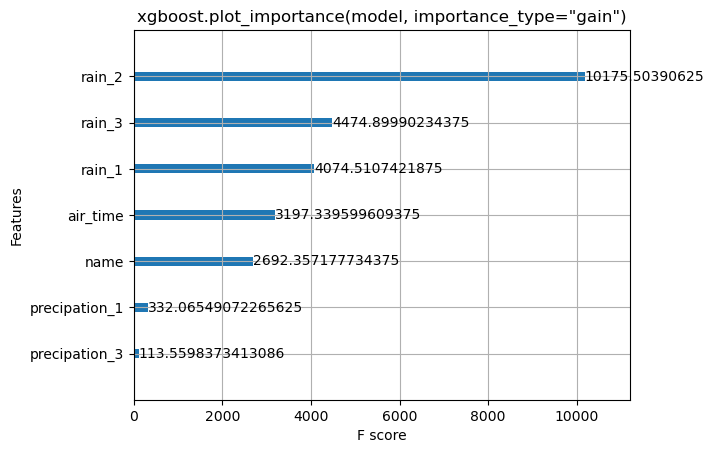

In [81]:
xgboost.plot_importance(xgb_model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [82]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

[02:21:44] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [86]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

In [87]:
shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values[:1000, :], X_test.iloc[:1000, :]
)

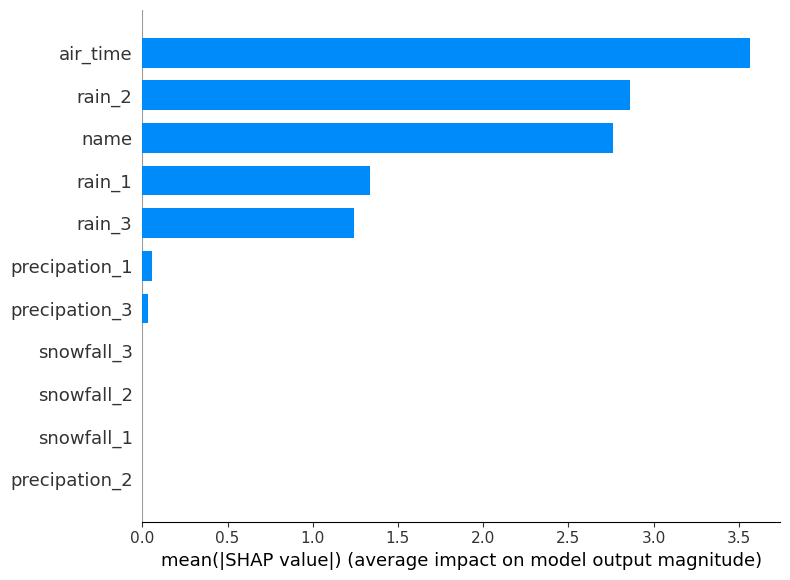

In [88]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


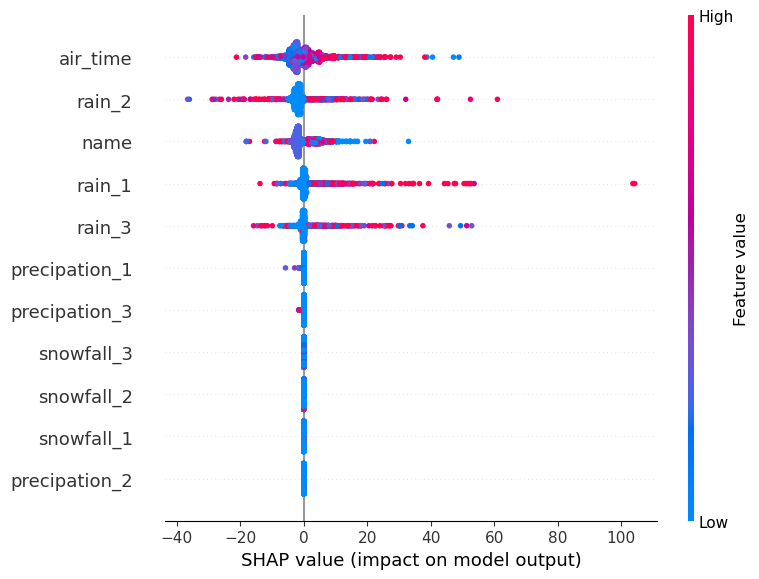

In [92]:
shap.summary_plot(shap_values, X_test)

In [ ]:
our_flight = pd.DataFrame({name: 6,	rain_1:  rain_2	rain_3	precipation_1	precipation_2	precipation_3	snowfall_1	snowfall_2	snowfall_3	air_time})

In [151]:
# old_atlanta_flights = flights[flights.dest == 'ATL']
# old_atlanta_flights = old_atlanta_flights[['year', 'month', 'day', 'sched_dep_time', 'dep_delay', 'sched_arr_time', 'arr_delay', 'air_time', 'hour', 'minute', 'time_hour', 'name']]
# atlanta_flights = atlanta_flights.dropna()
# old_atlanta_flights = old_atlanta_flights.reset_index().drop('index', axis=1)
# old_atlanta_flights['time_hour'] = pd.to_datetime(old_atlanta_flights['time_hour'])
# old_atlanta_flights['shed_arrival_time'] = old_atlanta_flights.time_hour + pd.to_timedelta(old_atlanta_flights.minute, unit = 'm') +\
# pd.to_timedelta(old_atlanta_flights.air_time, unit = 'm')
# old_atlanta_flights = old_atlanta_flights.reset_index().drop('index', axis=1)

invalid value encountered in cast
invalid value encountered in cast


In [ ]:
#6 IS ENCODED INDEX OF United Air Lines Inc.
14 15, 16

In [169]:
pogoda_lot = pd.read_csv("open-meteo-33.76N84.40W327m.csv", skiprows = 2)

In [171]:
pogoda_lot.head(5)

,time,temperature_2m (°C),precipitation (mm),rain (mm),showers (mm),snowfall (cm),wind_speed_10m (km/h)
0,2024-06-09T00:00,26.8,0.0,0.0,0.0,0.0,7.9
1,2024-06-09T01:00,25.1,0.0,0.0,0.0,0.0,6.8
2,2024-06-09T02:00,24.0,0.0,0.0,0.0,0.0,5.1
3,2024-06-09T03:00,22.4,0.0,0.0,0.0,0.0,2.5
4,2024-06-09T04:00,21.7,0.0,0.0,0.0,0.0,2.4


In [183]:
data = {
    'name': 6,
    'rain_1': 0,
    'rain_2': 0,
    'rain_3': 0,
    'precipation_1': 0,
    'precipation_2': 0,
    'precipation_3': 0,
    'snowfall_1': 0,
    'snowfall_2': 0,
    'snowfall_3': 0,
    'air_time': 143
}


my_flight = pd.DataFrame(data, index=[0])

my_flight

,name,rain_1,rain_2,rain_3,precipation_1,precipation_2,precipation_3,snowfall_1,snowfall_2,snowfall_3,air_time
0,6,0,0,0,0,0,0,0,0,0,143


In [186]:
xgb_model.predict(my_flight)

array([27.738045], dtype=float32)

In [185]:
shap.force_plot(explainer.expected_value, explainer.shap_values(my_flight), my_flight)